<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


## **Machine Learning Analysis fundamentals in Retail**


Estimated time needed: **1** hour


## Abstract


This lab is dedicated to learning the basic Machine Learning methods for Retail analysis based on Global Food Prices data from the World Food Programme covering such goods as maize, rice, beans, fish, and sugar for 76 countries and some 1,500 markets.


## Introduction


The main problem to be solved in this lab is the use of basic methods of machine learning to predict prices in markets around the world. Three different tasks of forecasting prices for purchases are considered, namely:
1. Establishing functional relationships between groups of goods in the markets of a particular country. Based on the found dependencies, the construction of the forecast and sensitivity analysis between price fluctuations for different groups of goods.
2. Establishing relationships between prices in the different markets of a country.
3. Analysing the impact of the exporting countries prices on the importing country domestic market prices.

The main difficulty of analysing real data is that it is prepared or presented in a form inconvenient for machine learning methods, there are no clear algorithms and rules for choosing machine learning methods for analysis.

This lab shows how to use a set of machine learning methods to solve such problems.


## Materials and methods


In this lab, we will learn how to download data, pre-prepare it, perform basic machine learning analysis and visualize the results.
This lab consists of the following steps:
* Data download and pre-preparation - download and changing the DataSet structure for ML analysis
* Forecasting of market prices
  - Analysis of the price relationship between groups of goods 
  - Price forecast for Chinese markets
  - Forecast of purchase prices depending on exporting countries.


The statistical data was obtained from the https://www.kaggle.com/lasaljaywardena/global-food-prices-dataset. This DataSet released under CC BY-IGO license that allow of encouraging free re-use of its data, both for non-commercial and commercial purposes. 

Exchange rate data was downloaded and grouped from Forex https://fxtop.com.


## Prerequisites
* [Python](https://www.python.org) - basic level
* [Pandas](https://pandas.pydata.org) - basic level 
* [SeaBorn](https://seaborn.pydata.org) - basic level
* [Scikit-learn](https://scikit-learn.org/stable/) - basic level


## Objectives


After completing this lab, you will be able to:


* Download a DataSet from *.csv files
* Create new and recalculate the values of existing columns
* Transform a table
* Join DataSets
* Visualize data with pandas and seaborn
* Make correlation analysis
* Apply basic methods of machine learning such as Linear regression and simple Neural Networks
* Calculate the accuracy of models
* Make forecasting 
* Calculate the sensitivity of models


## Import Libraries/Define Auxiliary Functions


**Running outside Skills Network Labs.** This notebook was tested within Skills Network Labs. Running in another environment should work as well, but is not guaranteed and may require different setup routine.


Libraries such as Pandas, MatplotLib, SeaBorn and Scikit-Learn should be installed.


In [ ]:
# conda install -c anaconda pandas

In [ ]:
# conda install -c anaconda matplotlib

In [ ]:
# conda install -c anaconda seaborn 

In [ ]:
conda install -c anaconda scikit-learn 

## Download and pre-preparation of data


In this lab, we will use the same DataSet. Therefore, we should first make a preliminary preparation of data as in the previous lab. We will repeat these steps without explanation.


Some libraries should be imported before you can begin.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.neural_network import MLPRegressor

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing th

Let's disable warnings by **[warnings.filterwarnings()](https://docs.python.org/3/library/warnings.html)**.


In [2]:
import warnings
warnings.filterwarnings('ignore')

Further specify the value of the precision parameter equal to 2 to display two decimal signs (instead of 6 as default) by **[pandas.set_option()](https://pandas.pydata.org/docs/reference/api/pandas.set_option.html)**  and  **[pd.options.display](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)**.


In [3]:
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

The next step is to download the data file from the repository and to create groups of goods with similar names.


In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0D45EN/global_food_prices.csv')
col = ['adm0_name', 'mkt_name', 'cm_name', 'cur_name', 'pt_name', 'um_name', 'mp_month', 'mp_year', 'mp_price']
df = df[col]
df = df[df['cm_name'].str.contains('Bread') | 
        df['cm_name'].str.contains('Milk') | 
        df['cm_name'].str.contains('Meat') | 
        df['cm_name'].str.contains('Fish') | 
        df['cm_name'].str.contains('Rice') |
        df['cm_name'].str.contains('Water') |
        df['cm_name'].str.contains('Exchange rate')]
df.loc[:, 'cm_name'] = df['cm_name'].apply(lambda x : str(x)[:str(x).find(' -')] )
df.loc[:, 'cm_name'] = df['cm_name'].apply(lambda x : str(x) if str(x).find(' (') == -1 else str(x)[:str(x).find(' (')] )
df

,adm0_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price
0,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,1,2014,50.00
1,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,2,2014,50.00
2,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,3,2014,50.00
3,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,4,2014,50.00
4,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,5,2014,50.00
...,...,...,...,...,...,...,...,...,...
2050625,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,12,2020,1187.50
2050626,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,2,2021,1123.33
2050627,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,3,2021,1390.00
2050628,Zimbabwe,Mbilashaba,Rice,ZWL,Retail,KG,6,2021,110.62


Next, transform the prices of purchases per 1 KG price.


In [5]:
d = {'KG': 1,
 'Unit': 1,
 'Pound': 0.45,
 '400 G': 0.4,
 '150 G': 0.15,
 '5 pcs': 1,
 '500 G': 0.5,
 '700 G': 0.7,
 '800 G': 0.8,
 '1.1 KG': 1.1,
 'Libra': 0.45,
 '900 G': 0.9,
 '100 KG': 100,
 '46 KG': 46,
 'Cuartilla': 2.88,
 '90 KG': 90,
 '120 KG': 120,
 '50 KG': 50,
 'MT': 1000,
 '45 KG': 45,
 '84 KG': 84,
 '100 Pounds': 45,
 'Marmite': 1,
 '5 KG': 5,
 '10 KG': 10,
 '1.4 KG': 1.4,
 '25 KG': 25,
 '2 KG': 2,
 'Loaf' : 1,
 '50 Pounds': 22.5,
 '380 G': 0.38,
 '500 ML': 0.5,
 '385 G': 0.385,
 '0.8 KG': 0.8,
 '200 ML': 0.2,
 '20 G': 0.02,
 '1.8 KG': 1.8,
 '125 G': 0.125,
 '20 KG': 20,
 '170 G': 0.17,
 '185 G': 0.185,
 '200 G': 0.2,
 '1.5 KG': 1.5,
 '1.2 KG': 1.2,
 'Bundle': 46,
 '160 G': 0.16,
 'Cubic meter': 1,
 '1.5 L': 1.5,
 'L': 1,
 'USD/LCU': 1}

In [6]:
df['um_koef'] = df['um_name'].map(d)
df['mp_price_un'] = df['mp_price'] / df['um_koef']
df

,adm0_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price,um_koef,mp_price_un
0,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,1,2014,50.00,1.00,50.00
1,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,2,2014,50.00,1.00,50.00
2,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,3,2014,50.00,1.00,50.00
3,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,4,2014,50.00,1.00,50.00
4,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,5,2014,50.00,1.00,50.00
...,...,...,...,...,...,...,...,...,...,...,...
2050625,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,12,2020,1187.50,1.00,1187.50
2050626,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,2,2021,1123.33,1.00,1123.33
2050627,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,3,2021,1390.00,1.00,1390.00
2050628,Zimbabwe,Mbilashaba,Rice,ZWL,Retail,KG,6,2021,110.62,1.00,110.62


At the end of pre-preparation, let's create a resulting DataSet.


In [7]:
df_res = pd.pivot_table(df, values= 'mp_price_un', index= ['adm0_name', 'mp_year', 'mp_month', 'mkt_name'], columns=['cm_name'], aggfunc='mean', margins=False)
df_res = df_res[['Bread', 'Fish', 'Meat', 'Milk', 'Rice', 'Water']]
df_res

cm_name                                               Bread    Fish  Meat  \
adm0_name   mp_year mp_month mkt_name                                       
Afghanistan 2000    1        Hirat                    15.63     NaN   NaN   
                             Jalalabad                14.86     NaN   NaN   
                             Kabul                    14.26     NaN   NaN   
                             Kandahar                 16.25     NaN   NaN   
                    2        Hirat                    15.63     NaN   NaN   
...                                                     ...     ...   ...   
Zimbabwe    2021    6        Sizinda Shopping Centre    NaN     NaN   NaN   
                             Torwood 1                  NaN 1000.00   NaN   
                             Torwood 2                  NaN     NaN   NaN   
                             Victoria Falls             NaN 1270.45   NaN   
                             Zvishavane Urban           NaN 1227.70   NaN   

cm_name                                               Milk   Rice  Water  
adm0_name   mp_year mp_month mkt_name                                     
Afghanistan 2000    1        Hirat                     NaN    NaN    NaN  
                             Jalalabad                 NaN    NaN    NaN  
                             Kabul                     NaN    NaN    NaN  
                             Kandahar                  NaN    NaN    NaN  
                    2        Hirat                     NaN    NaN    NaN  
...                                                    ...    ...    ...  
Zimbabwe    2021    6        Sizinda Shopping Centre   NaN  82.50    NaN  
                             Torwood 1                 NaN  85.00    NaN  
                             Torwood 2                 NaN  85.00    NaN  
                             Victoria Falls            NaN 123.43    NaN  
                             Zvishavane Urban          NaN 152.44    NaN  

[170509 rows x 6 columns]

## Forecasting of market prices


As you can see, the resulting DataSet has a user-friendly structure. Grouped columns are arranged as indexes. However, for machine learning analysis, these columns should be transformed into the appearance of normal columns. 


In [8]:
df_stat = df_res.reset_index()
df_stat

cm_name,adm0_name,mp_year,mp_month,mkt_name,Bread,Fish,Meat,Milk,Rice,Water
0,Afghanistan,2000,1,Hirat,15.63,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2000,1,Jalalabad,14.86,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2000,1,Kabul,14.26,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2000,1,Kandahar,16.25,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2000,2,Hirat,15.63,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
170504,Zimbabwe,2021,6,Sizinda Shopping Centre,NaN,NaN,NaN,NaN,82.50,NaN
170505,Zimbabwe,2021,6,Torwood 1,NaN,1000.00,NaN,NaN,85.00,NaN
170506,Zimbabwe,2021,6,Torwood 2,NaN,NaN,NaN,NaN,85.00,NaN
170507,Zimbabwe,2021,6,Victoria Falls,NaN,1270.45,NaN,NaN,123.43,NaN


### Analysis of the price relationship between groups of goods


**The task is to establish a functional relationship between prices for different groups of goods inside of a country. Based on this relationship, it is necessary to build a price forecast and determine the sensitivity of the price of one group of goods to changes in the price of another group of goods.**


#### DataSet creation


Let's solve this task using the example of Ukraine. As shown in the previous lab, the DataSet for this country contains information on different product groups. 


In [9]:
df_ukr = df_stat[df_stat['adm0_name']=='Ukraine'].groupby(['mp_year','mp_month']).mean()
df_ukr.columns.name = "Type of Purchase"
df_ukr

Type of Purchase  Bread  Fish  Meat  Milk  Rice  Water
mp_year mp_month                                      
2014    3          4.87   NaN 37.76  7.93  8.58    NaN
        4          5.00   NaN 39.84  8.04  9.39    NaN
        5          5.27   NaN 41.14  8.08  9.87    NaN
        6          5.39   NaN 42.45  8.10 10.20    NaN
        7          5.49   NaN 44.24  8.08 10.28    NaN
        8          5.54   NaN 45.05  8.11 10.41    NaN
        9          5.87   NaN 47.22  8.27 11.47    NaN
        10         6.24   NaN 48.98  8.54 12.53    NaN
        11         6.30   NaN 49.04  8.66 13.25    NaN
        12         6.37   NaN 50.01  8.76 15.28    NaN
2015    1          6.78   NaN 50.58  8.95 17.51    NaN
        2          7.30   NaN 50.91  9.13 18.81    NaN
        3          9.31   NaN 54.80  9.65 24.07    NaN
        4          9.72   NaN 57.48 10.04 23.09    NaN
        5          9.76   NaN 58.34 10.19 21.62    NaN
        6          9.76   NaN 59.01 10.38 19.63    NaN
        7          9.76   NaN 60.37 10.51 18.27    NaN
        8          9.75   NaN 62.30 10.59 17.84    NaN
        9          9.75   NaN 62.54 10.77 17.67    NaN
        10         9.76   NaN 61.68 10.97 17.19    NaN
        11         9.77   NaN 61.58 11.36 16.84    NaN
        12        10.03   NaN 61.59 11.71 16.98    NaN
2016    1         10.04   NaN 61.53 11.90 16.82    NaN
        2         10.11   NaN 60.05 12.23 16.48    NaN
        3         10.13   NaN 59.77 12.47 16.11    NaN
        4         10.15   NaN 60.63 12.44 15.75    NaN
        5         10.16   NaN 61.45 12.47 15.58    NaN
        6         10.20   NaN 60.82 12.43 15.21    NaN
        7         10.22   NaN 61.36 12.53 15.28    NaN
        8         10.23   NaN 61.57 12.61 15.45    NaN
        9         10.24   NaN 63.25 12.87 15.93    NaN
        10        10.32   NaN 63.50 13.39 16.14    NaN
        11        10.45   NaN 63.32 14.19 16.24    NaN
        12        10.67   NaN 64.64 15.22 16.28    NaN
2017    1         10.87   NaN 66.08 15.74 16.55    NaN
        2         11.34   NaN 68.22 16.34 16.78    NaN
        3         11.67   NaN 68.80 16.52 17.11    NaN
        4         11.79   NaN 71.01 16.60 17.29    NaN
        5         11.85   NaN 72.78 16.55 17.60    NaN
        6         11.95   NaN 76.53 16.60 18.19    NaN
        7         11.99   NaN 80.06 16.72 18.49    NaN
        9         12.30   NaN 85.13 17.34 19.48    NaN
        10        12.53   NaN 85.38 17.75 19.75    NaN
        11        12.82   NaN 84.76 18.22 20.05    NaN
        12        13.07   NaN 85.57 18.56 19.87    NaN

As you can see, the DataSet contains information about four groups of goods: Bread, Meat, Milk and Rice. Let's remove all other groups of goods. After that let's visualise the prices.


<AxesSubplot:title={'center':'Purchaches'}, xlabel='Years, Month', ylabel='Price UAH'>

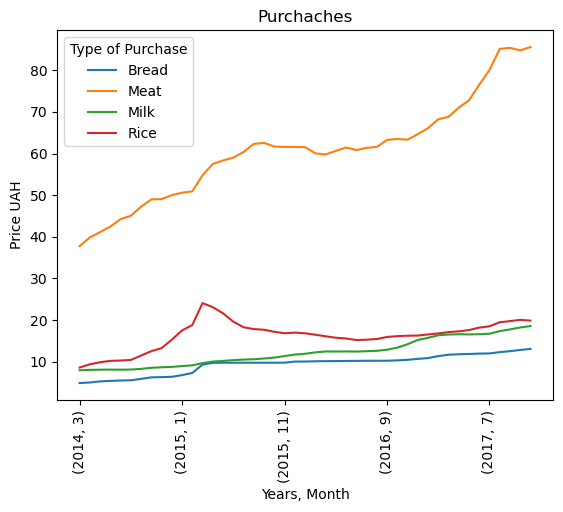

In [10]:
uk_col = ['Bread', 'Meat', 'Milk' ,'Rice']
df_ukr = df_ukr[uk_col]
df_ukr.plot(xlabel='Years, Month', ylabel='Price UAH', title='Purchaches', rot=90)

As you can see, the prices on all types of goods are incresing over time. Meat is the most expensive type of goods.


#### Correlation analysis


The basic method of detecting a pairwise linear relationship between factors is a correlation analysis. It's easy be calculated by Pandas: **[pandas.DataFrame.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)**.


In [11]:
df_ukr.corr()

Type of Purchase,Bread,Meat,Milk,Rice
Type of Purchase,,,,
Bread,1.00,0.95,0.91,0.73
Meat,0.95,1.00,0.94,0.66
Milk,0.91,0.94,1.00,0.49
Rice,0.73,0.66,0.49,1.00


Diagonal elements of a correlation matrix are always equal. This matrix also is symmetric with respect to the main diagonal. The elements are correlation coefficients that can be interpreted as:

*  0.8  -  1.0: strong linear relationship between factors
*  0.6  -  0.8: a nonlinear connection may be present
* -0.6  -  0.6: no linear connections
* -0.6  - -0.8: inverse nonlinear connection may be present
* -1.0  - -0.8: strong inverse linear relationship between factors

It is convenient to visualize this matrix for easier analysis using **[seaborn.heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html)**.

Correlation analysis is basic for all machine learning tasks. In our laboratory we will solve three tasks.
So, let's create our own function for this.


In [12]:
def my_headmap(corr):
    '''
    Input:
    corr: correlation matrix in DataFrame
    '''
    # Generate a mask for the upper triangle because it contains duplicate information
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap='RdYlGn', vmin=-1., vmax=1., annot=True, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})   

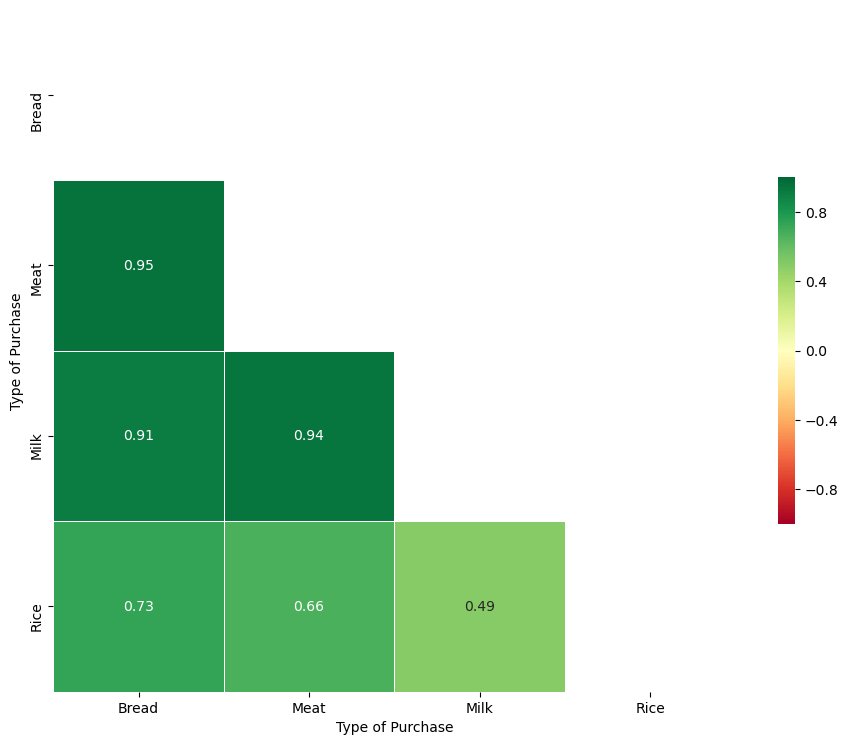

In [13]:
my_headmap(df_ukr.corr())

As you can see, the correlation matrix in this form allows you to easily identify interdependent factors.

Thus, in our case, the greatest relationship is observed between market prices on meat, bread and milk.


#### Forecasting by a machine learning model


Let's build a forecast model of meat prices depending on prices for other groups of goods.
In order to do this, we need to divide the DataSet into a training and a test one.
As shown above, the DataSet for Ukraine contains information on prices from 2014 to 2017. Let's try to predict prices for 2017. Therefore, we divide the DataSet into a training (2014-2016) and a test one (2017).


In [14]:
train = df_ukr[df_ukr.index.get_level_values(0) != 2017]
test = df_ukr[df_ukr.index.get_level_values(0) == 2017]

print(train)
print(test)

Type of Purchase  Bread  Meat  Milk  Rice
mp_year mp_month                         
2014    3          4.87 37.76  7.93  8.58
        4          5.00 39.84  8.04  9.39
        5          5.27 41.14  8.08  9.87
        6          5.39 42.45  8.10 10.20
        7          5.49 44.24  8.08 10.28
        8          5.54 45.05  8.11 10.41
        9          5.87 47.22  8.27 11.47
        10         6.24 48.98  8.54 12.53
        11         6.30 49.04  8.66 13.25
        12         6.37 50.01  8.76 15.28
2015    1          6.78 50.58  8.95 17.51
        2          7.30 50.91  9.13 18.81
        3          9.31 54.80  9.65 24.07
        4          9.72 57.48 10.04 23.09
        5          9.76 58.34 10.19 21.62
        6          9.76 59.01 10.38 19.63
        7          9.76 60.37 10.51 18.27
        8          9.75 62.30 10.59 17.84
        9          9.75 62.54 10.77 17.67
        10         9.76 61.68 10.97 17.19
        11         9.77 61.58 11.36 16.84
        12        10.03 61.59 11.7

Let's set input and output fields.


In [15]:
x_col = ['Bread', 'Milk', 'Rice']
y_col = ['Meat']

In [16]:
x_train = train[x_col]
y_train = train[y_col]
x_test = test[x_col]
y_test = test[y_col]
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (34, 3)
y_train: (34, 1)
x_test: (11, 3)
y_test: (11, 1)


As you can see, the training DataSet has 34 rows and 3 input fields. The test one has 11 rows. (Information about August 2017 is missing in the DataSet.)


Now we are ready to create an ML model. As the correlation analysis showed, we can use a simple linear model. In order to do this, it is necessary to create the linear model itself, fit it, test it, and make a prediction. Let's use **[sklearn.linear_model.LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)**.




In [17]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

The prediction results for the training and test sets are in **y_pred_test** and **y_pred_train** variables. After that, we can check adequacy and accuracy of our model using **[sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)**. Also, we can get the parameters of the linear model.


In [18]:
print("Correlation train", regressor.score(x_train, y_train))
print("Correlation test", regressor.score(x_test, y_test))
print("Coefficients:", regressor.coef_)
# pair the feature names with the coefficients
print('Pair the feature names with the coefficients:')
for s in zip(col[1:], regressor.coef_):
    print(s[0], ":", s[1])
print("Intercept", regressor.intercept_)
print('Mean Absolute Error (train):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Absolute Error (test):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error (train):', metrics.mean_squared_error(y_train, y_pred_train))
print('Mean Squared Error (test):', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error (test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Correlation train 0.9545206041085881
Correlation test -0.4819147867105662
Coefficients: [[ 3.66555076  0.20947018 -0.02407153]]
Pair the feature names with the coefficients:
mkt_name : [ 3.66555076  0.20947018 -0.02407153]
Intercept [22.35947537]
Mean Absolute Error (train): 1.4269955792263167
Mean Absolute Error (test): 7.2346333603184325
Mean Squared Error (train): 2.8918613497126486
Mean Squared Error (test): 80.30371970777026
Root Mean Squared Error (train): 1.7005473676768457
Root Mean Squared Error (test): 8.961234273679617


We can see, the model is fitted well on the training DataSet (strong correlation) but very badly on the test DataSet.

Let's find out why this happened.

In order to do it, we will visualize the results. Let's create a resulting DataFrame by combining the results of calculations and real data using **[pandas.DataFrame()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)** and **[pandas.DataFrame.join()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html)**.


In [19]:
for_test = pd.DataFrame({'Actual_test': y_test.values.flatten(), 
                         'Predicted_test': y_pred_test.flatten()})
for_test.index = y_test.index
for_train = pd.DataFrame({'Actual_train': y_train.values.flatten(), 
                         'Predicted_train': y_pred_train.flatten()})
for_train.index = y_train.index
res = for_train.join(for_test, how='outer')
res

Actual_train  Predicted_train  Actual_test  Predicted_test
mp_year mp_month                                                            
2014    3                37.76            41.68          NaN             NaN
        4                39.84            42.16          NaN             NaN
        5                41.14            43.12          NaN             NaN
        6                42.45            43.58          NaN             NaN
        7                44.24            43.91          NaN             NaN
        8                45.05            44.10          NaN             NaN
        9                47.22            45.35          NaN             NaN
        10               48.98            46.72          NaN             NaN
        11               49.04            46.95          NaN             NaN
        12               50.01            47.18          NaN             NaN
2015    1                50.58            48.66          NaN             NaN
        2                50.91            50.57          NaN             NaN
        3                54.80            57.94          NaN             NaN
        4                57.48            59.54          NaN             NaN
        5                58.34            59.75          NaN             NaN
        6                59.01            59.82          NaN             NaN
        7                60.37            59.91          NaN             NaN
        8                62.30            59.90          NaN             NaN
        9                62.54            59.93          NaN             NaN
        10               61.68            60.01          NaN             NaN
        11               61.58            60.14          NaN             NaN
        12               61.59            61.16          NaN             NaN
2016    1                61.53            61.25          NaN             NaN
        2                60.05            61.58          NaN             NaN
        3                59.77            61.72          NaN             NaN
        4                60.63            61.79          NaN             NaN
        5                61.45            61.85          NaN             NaN
        6                60.82            61.98          NaN             NaN
        7                61.36            62.09          NaN             NaN
        8                61.57            62.11          NaN             NaN
        9                63.25            62.19          NaN             NaN
        10               63.50            62.61          NaN             NaN
        11               63.32            63.25          NaN             NaN
        12               64.64            64.27          NaN             NaN
2017    1                  NaN              NaN        66.08           65.11
        2                  NaN              NaN        68.22           66.95
        3                  NaN              NaN        68.80           68.18
        4                  NaN              NaN        71.01           68.65
        5                  NaN              NaN        72.78           68.84
        6                  NaN              NaN        76.53           69.19
        7                  NaN              NaN        80.06           69.35
        9                  NaN              NaN        85.13           70.60
        10                 NaN              NaN        85.38           71.52
        11                 NaN              NaN        84.76           72.68
        12                 NaN              NaN        85.57           73.67

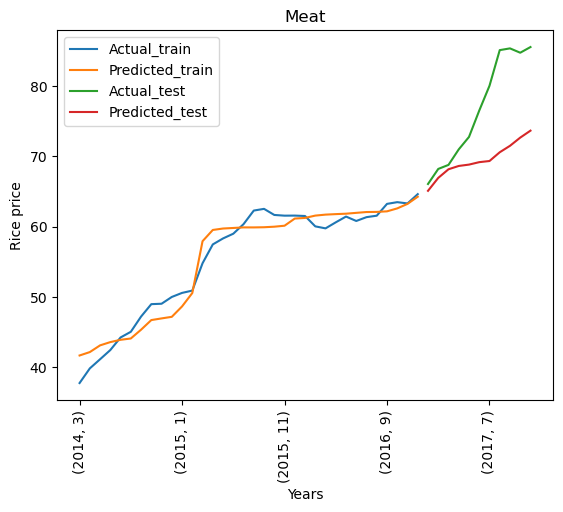

In [20]:
res.plot(xlabel='Years', ylabel='Rice price', title=y_col[0], rot=90)
plt.show()

As you can see, the forecast is very good for the first three months. But after this period, we will have a serious mistake. Therefore, the correlation for the test DataSet is very bad.

**There is an empirical rule: regardless of the choice of machine learning methods, an adequate forecast can be obtained no further than for 10% of the size of the training sample.** As shown above, the number of records in our case is 34. So it means that an adequate forecast can be expected for no more than 3 months ahead!

This rule is not strict but for real data it works very well.


#### Sensitivity analysis


Let's analyse how a change in the price of a particular product group will affect the price of another product group. To do this, we need:
1. Build a model of the dependence of the value of one type of product (Y) on another one (X).
2. Calculate the forecast value (Y) at the end of the known period.
3. Increase (decrease) the value (X), for example by 10%, and calculate the change in value (Y) using the model.

Let's create a separate function for it:


In [21]:
def my_sens(x, y, p):
    '''
    Input:
    x: DataFrame of input Linear Regression
    y: Series of output Linear Regression
    p: Percentage of price change
    Return:
    Sensitivity of target
    '''
    regressor = LinearRegression()
    regressor.fit(x, y)           
    y_pred = regressor.predict(x.iloc[-1:])
    y_pred_delta = regressor.predict(x.iloc[-1:]*(1+p))
    return ((y_pred_delta - y_pred) / y_pred)[0]

Let's calculate the sensitivity of Meat price to Bread price.


In [22]:
print("Sensitivity of Meat price on Milk price: %5.2f%%" % (my_sens(df_ukr[['Bread']], df_ukr['Meat'], 0.1) * 100))

Sensitivity of Meat price on Milk price:  8.10%


As you can see, Bread price increasing by 10% will lead to Meat price increasing by 8.10%.


Let's calculate this sensitivity for all types of goods.


In [23]:
s = np.zeros((len(df_ukr.columns), len(df_ukr.columns)))

for i, r in enumerate(df_ukr.columns):
    for j, c in enumerate(df_ukr.columns):
        s[i, j] = my_sens(df_ukr[[c]], df_ukr[r], 0.1)

s = pd.DataFrame(s)*100
s.index = df_ukr.columns.copy()
s.columns = df_ukr.columns.copy()
s.columns.name = 'input'
s.index. name = 'output'
s

input,Bread,Meat,Milk,Rice
output,,,,
Bread,10.00,11.28,8.91,8.82
Meat,8.10,10.00,7.75,6.68
Milk,9.87,11.80,10.00,6.72
Rice,6.96,7.75,4.92,10.00


The obtained DataFrame allows you to make the sensitivity analysis of the types of goods of the whole country market.


### Price forecast for Chinese markets


**In this task, we need to build a forecast model that predicts the value of purchases prices at one of the markets depending on the other markets using the example of China**.


#### DataSet creation


Let's create a necessary DataSet for Chinese Rice markets:


In [24]:
df_for = pd.pivot_table(df[(df['adm0_name'] == 'China') & (df['cm_name'] == 'Rice')], 
                        values= 'mp_price_un', index= ['adm0_name', 'mp_year', 'mp_month'], columns=['mkt_name'], aggfunc='mean', margins=False)

df_for

mkt_name                    Hangzhou  Hubei  Jiujiang  Wuhan  Yuncheng
adm0_name mp_year mp_month                                            
China     2014    1             4.22   3.92      4.15   4.40      4.76
                  2             4.25   3.94      4.15   4.40      4.76
                  3             4.28   4.02      4.16   4.40      4.76
                  4             4.32   4.00      4.16   4.40      4.74
                  5             4.32   3.94      4.17   4.40      4.72
...                              ...    ...       ...    ...       ...
          2020    6             4.19   3.60      3.96   4.30      4.28
                  7             4.20   3.60      3.96   4.30      4.28
                  8             4.21   3.90      3.96   4.30      4.28
                  9             4.21   3.90      3.96   4.30      4.28
                  10            4.21   4.01      3.96   4.29      4.28

[82 rows x 5 columns]

As you can see, there are five markets in China. 


#### Correlation analysis


Let's calculate correlation between prices on these markets using our function.


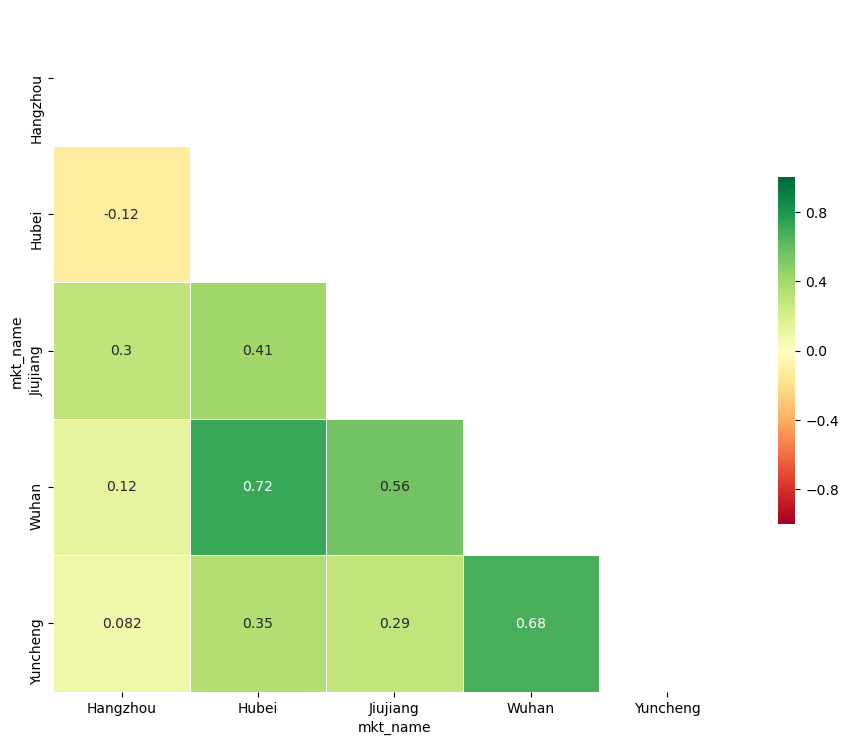

In [25]:
my_headmap(df_for.corr())

As you can see from the image, in contrast to the previous task, there is no linear relationship between rice prices in different markets in China. That is, either prices are not interdependent or there is a nonlinear relationship. Let's explore this.


#### Forecasting by a machine learning model


Let's divide the DataSet into a training one (2014 - 2019) and a test one (2020).


In [26]:
train = df_for[df_for.index.get_level_values(1) != 2020]
test = df_for[df_for.index.get_level_values(1) == 2020]

print(train)
print(test)

mkt_name                    Hangzhou  Hubei  Jiujiang  Wuhan  Yuncheng
adm0_name mp_year mp_month                                            
China     2014    1             4.22   3.92      4.15   4.40      4.76
                  2             4.25   3.94      4.15   4.40      4.76
                  3             4.28   4.02      4.16   4.40      4.76
                  4             4.32   4.00      4.16   4.40      4.74
                  5             4.32   3.94      4.17   4.40      4.72
...                              ...    ...       ...    ...       ...
          2019    8             4.03   3.94      4.12   4.54      5.60
                  9             3.92   3.91      3.99   4.35      5.30
                  10            4.10   3.84      3.97   4.38      4.70
                  11            4.14   3.84      3.96   4.38      4.28
                  12            4.14   3.84      3.96   4.38      4.28

[72 rows x 5 columns]
mkt_name                    Hangzhou  Hubei  Jiujiang 

Let's investigate the dependence of prices in Hubei market upon Hangzhou, Jiujiang, Wuhan and Yuncheng markets.


In [27]:
x_col = ['Hangzhou', 'Jiujiang', 'Wuhan', 'Yuncheng']
y_col = ['Hubei']

In [28]:
x_train = train[x_col]
y_train = train[y_col]
x_test = test[x_col]
y_test = test[y_col]
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (72, 4)
y_train: (72, 1)
x_test: (10, 4)
y_test: (10, 1)


As you can see, the training DataSet is twice as large as in the previous task.


Let's start from a linear model.


In [29]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [30]:
print("Correlation train", regressor.score(x_train, y_train))
print("Correlation test", regressor.score(x_test, y_test))
print("Coefficients:", regressor.coef_)
# pair the feature names with the coefficients
print('Pair the feature names with the coefficients:')
for s in zip(col[1:], regressor.coef_):
    print(s[0], ":", s[1])
print("Intercept", regressor.intercept_)
print('Mean Absolute Error (train):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Absolute Error (test):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error (train):', metrics.mean_squared_error(y_train, y_pred_train))
print('Mean Squared Error (test):', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error (test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Correlation train 0.5370494145783034
Correlation test -0.2410294487677591
Coefficients: [[-0.28842787 -0.00906836  0.69587703 -0.12718491]]
Pair the feature names with the coefficients:
mkt_name : [-0.28842787 -0.00906836  0.69587703 -0.12718491]
Intercept [2.66015559]
Mean Absolute Error (train): 0.08168098395649787
Mean Absolute Error (test): 0.12736276543058245
Mean Squared Error (train): 0.009044135529503249
Mean Squared Error (test): 0.023630441733986866
Root Mean Squared Error (train): 0.0951006599845829
Root Mean Squared Error (test): 0.15372196243213546


As you can see, there is a big difference in accuracy between the training and test results. It means that this linear model is not correct. 
Besides, this framework cannot generate a summary report.
In order to do this, we can use the **[statsmodels.api](https://www.statsmodels.org/stable/index.html)** framework.


In [31]:
model = sm.OLS(y_train, x_train)
results = model.fit()
y_pred_test_OLS = results.predict(x_test)
y_pred_train_OLS = results.predict(x_train)
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Hubei   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.648e+04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):                   9.82e-108
Time:                        05:26:15   Log-Likelihood:                          61.889
No. Observations:                  72   AIC:                                     -115.8
Df Residuals:                      68   BIC:                                     -106.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

As you can see, this framework uses the same principles for creating and fitting models. It allows us to build a summary report, also you can get all the other stats coefficients in the same way:


In [32]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params, sep = '\n')

coefficient of determination: 0.9993583340752841
adjusted coefficient of determination: 0.999320589020889
regression coefficients:
Hangzhou   -0.22
Jiujiang    0.47
Wuhan       0.73
Yuncheng   -0.08
dtype: float64


Since the dependence turned out to be nonlinear, we will try to build a nonlinear model based on neural networks. The most popular libraries that allow you to build neural networks include **[scikit-learn](https://scikit-learn.org/stable/index.html)**.

The advantage of these frameworks is that the principles of construction, training and forecasting are identical to those of the linear model. Only the model creation is different. This is an example of the polymorphism of OOP.


Let's create a multi-layer Neural Network that consists of 2 hidden layers with 10 neurons each.


In [33]:
regressor = MLPRegressor(hidden_layer_sizes = (10, 10), solver='lbfgs', activation = 'relu',
                          learning_rate_init=0.00001,)
regressor.fit(x_train, y_train)
y_pred_test_MLP = regressor.predict(x_test)
y_pred_train_MLP = regressor.predict(x_train)

In [34]:
print("Correlation train", regressor.score(x_train, y_train))
print("Correlation test", regressor.score(x_test, y_test))

print('Mean Absolute Error (train):', metrics.mean_absolute_error(y_train, y_pred_train_MLP))
print('Mean Absolute Error (test):', metrics.mean_absolute_error(y_test, y_pred_test_MLP))
print('Mean Squared Error (train):', metrics.mean_squared_error(y_train, y_pred_train_MLP))
print('Mean Squared Error (test):', metrics.mean_squared_error(y_test, y_pred_test_MLP))
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_MLP)))
print('Root Mean Squared Error (test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_MLP)))

Correlation train 0.5370486516592694
Correlation test -0.23869774439526936
Mean Absolute Error (train): 0.08168160631089359
Mean Absolute Error (test): 0.12734644505992257
Mean Squared Error (train): 0.009044150433778906
Mean Squared Error (test): 0.023586043751030288
Root Mean Squared Error (train): 0.09510073834507757
Root Mean Squared Error (test): 0.1535774845185006


As you can see, the accuracy of the obtained results is very low. It means that there are not dependencies between rice prices at different markets in China.


Let's plot the results to prove this conclusion:


In [35]:
for_test = pd.DataFrame({'Actual_test': y_test.values.flatten(), 
                         'Predicted_test': y_pred_test.flatten(), 
                         'Predicted_test_OLS': y_pred_test_OLS.values.flatten(),
                         'Predicted_test_MLP': y_pred_test_MLP.flatten(),})
for_test.index = y_test.index
for_train = pd.DataFrame({'Actual_train': y_train.values.flatten(), 
                         'Predicted_train': y_pred_train.flatten(), 
                         'Predicted_train_OLS': y_pred_train_OLS.values.flatten(),
                         'Predicted_train_MLP': y_pred_train_MLP.flatten(),})
for_train.index = y_train.index
res = for_train.join(for_test, how='outer')
res

Actual_train  Predicted_train  \
adm0_name mp_year mp_month                                  
China     2014    1                 3.92             3.86   
                  2                 3.94             3.85   
                  3                 4.02             3.85   
                  4                 4.00             3.84   
                  5                 3.94             3.84   
...                                  ...              ...   
          2020    6                  NaN              NaN   
                  7                  NaN              NaN   
                  8                  NaN              NaN   
                  9                  NaN              NaN   
                  10                 NaN              NaN   

                            Predicted_train_OLS  Predicted_train_MLP  \
adm0_name mp_year mp_month                                             
China     2014    1                        3.84                 3.86   
                  2                        3.84                 3.85   
                  3                        3.83                 3.85   
                  4                        3.83                 3.84   
                  5                        3.83                 3.84   
...                                         ...                  ...   
          2020    6                         NaN                  NaN   
                  7                         NaN                  NaN   
                  8                         NaN                  NaN   
                  9                         NaN                  NaN   
                  10                        NaN                  NaN   

                            Actual_test  Predicted_test  Predicted_test_OLS  \
adm0_name mp_year mp_month                                                    
China     2014    1                 NaN             NaN                 NaN   
                  2                 NaN             NaN                 NaN   
                  3                 NaN             NaN                 NaN   
                  4                 NaN             NaN                 NaN   
                  5                 NaN             NaN                 NaN   
...                                 ...             ...                 ...   
          2020    6                3.60            3.86                3.72   
                  7                3.60            3.86                3.72   
                  8                3.90            3.86                3.72   
                  9                3.90            3.86                3.72   
                  10               4.01            3.85                3.71   

                            Predicted_test_MLP  
adm0_name mp_year mp_month                      
China     2014    1                        NaN  
                  2                        NaN  
                  3                        NaN  
                  4                        NaN  
                  5                        NaN  
...                                        ...  
          2020    6                       3.86  
                  7                       3.86  
                  8                       3.86  
                  9                       3.86  
                  10                      3.85  

[82 rows x 8 columns]

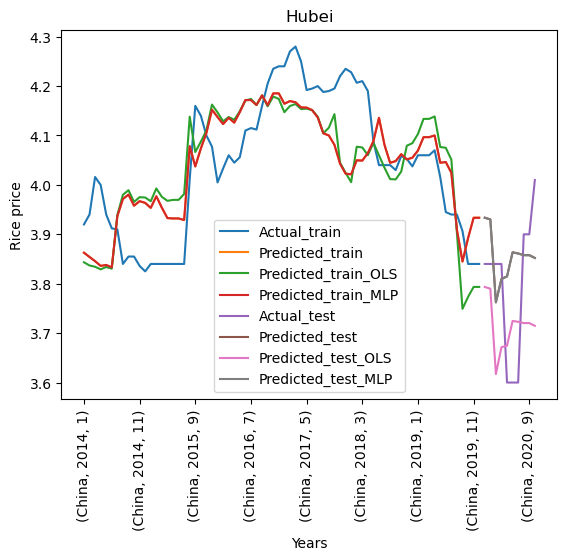

In [36]:
res.plot(xlabel='Years', ylabel='Rice price', title=y_col[0], rot=90)
plt.show()

As you can see from the plot, there is serious mistake in forecast for the whole period, including the first months. 

It confirms our conclusion about the lack of functional dependence. The reason might be artificial price regulation in this country.


### Forecast of purchases prices depending on exporting countries


**The task is to find functional dependencies between rice prices in Ukraine depending on the prices of major exporting countries. Based on this we should make a forecast of purchases prices and investigate the sensitivity of Ukrainian rice market to prices of exporting-countries**.


#### DataSet creation


According to https://www.ers.usda.gov/topics/crops/rice/trade/, the main rice exporting countries are India, Thailand, Vietnam, Pakistan, and China. Let's study the presence of these countries in our DataSet:


In [37]:
df_stat['adm0_name'].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Bassas da India', 'Belarus', 'Benin',
       'Bhutan', 'Bolivia', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran  (Islamic Republic of)', 'Iraq', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mexico', 'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Panama', 'Paraguay',
       'Peru'

Let's create a list of names of these countries, including Ukraine.


In [38]:
export_counties = ['Thailand', 'Viet Nam', 'China', 'Bassas da India', 'Pakistan', 'Ukraine']

Let's transform our DataSet for this task:


In [39]:
df_exp = pd.pivot_table(df[df['cm_name'] == 'Rice'], 
                        values= 'mp_price_un', index= ['mp_year', 'mp_month'], columns=['adm0_name'], aggfunc='mean', margins=False)
df_exp = df_exp[export_counties].dropna()
df_exp

adm0_name         Thailand  Viet Nam  China  Bassas da India  Pakistan  \
mp_year mp_month                                                         
2014    3            10.88   7470.00   4.29            27.65     65.33   
        4            10.31   7206.25   4.30            27.60     65.42   
        5            10.20   7316.67   4.29            27.85     65.58   
        6            10.77   7241.25   4.29            28.03     65.64   
        7            11.23   7631.25   4.31            28.25     65.74   
        8            11.67   8247.50   4.31            28.36     65.72   
        9            11.59   8195.00   4.33            28.34     65.87   
        10           11.69   7981.25   4.33            27.96     66.07   
        11           11.47   7792.50   4.32            27.58     66.29   
        12           11.48   7213.75   4.32            27.29     65.24   
2015    1            11.49   7025.00   4.33            27.12     63.14   
        2            11.35   6825.00   4.34            27.10     63.92   
        3            11.11   6978.75   4.37            26.94     63.14   
        4            10.86   6943.75   4.39            27.09     61.25   
        5            10.85   6806.25   4.39            27.07     60.71   
        6            10.77   6738.75   4.39            27.28     60.48   
        7            11.32   6675.00   4.41            27.03     59.88   
        8            11.25   6725.00   4.46            26.86     59.80   
        9            10.94   6725.00   4.40            27.00     59.80   
        10           11.42   6887.50   4.36            26.97     58.39   
        11           11.39   7487.50   4.32            26.97     55.45   
        12           11.19   7512.50   4.33            27.14     54.39   
2016    1            11.48   7414.58   4.33            27.01     54.89   
        2            11.61   7237.50   4.33            26.68     54.59   
        3            11.55   7352.50   4.33            26.61     53.51   
        4            11.77   7425.00   4.33            26.59     53.94   
        5            12.72   7350.00   4.33            26.57     54.17   
        6            12.91   7135.42   4.35            26.82     54.37   
        7            12.95   6983.33   4.35            26.97     54.75   
        8            12.23   6945.00   4.35            27.27     56.63   
        9            11.59   6731.25   4.35            27.45     57.00   
        10           11.24   6660.00   4.34            27.53     56.58   
        11           10.89   6918.75   4.34            27.89     56.23   
        12           11.41   6845.00   4.34            28.44     56.33   
2017    1            11.51   6833.33   4.34            28.78     56.66   
        2            11.13   7029.17   4.34            29.10     57.98   
        3            11.02   7116.67   4.35            29.02     58.56   
        4            11.21   7035.42   4.35            28.94     59.65   
        5            12.10   6815.00   4.35            29.03     57.52   
        6            13.22   7250.00   4.37            29.26     61.60   
        7            11.89   7845.00   4.37            29.94     62.13   
        9            10.89   7745.00   4.38            30.27     63.17   
        10           10.92   7887.50   4.42            30.35     63.50   
        11           10.91   8135.42   4.42            30.43     64.04   
        12           10.79   8052.50   4.44            30.29     64.34   

adm0_name         Ukraine  
mp_year mp_month           
2014    3            8.58  
        4            9.39  
        5            9.87  
        6           10.20  
        7           10.28  
        8           10.41  
        9           11.47  
        10          12.53  
        11          13.25  
        12          15.28  
2015    1           17.51  
        2           18.81  
        3           24.07  
        4           23.09  
        5           21.62  
        6           19.63  
        7        

#### US dollar converter


As it was noted in Lab1, all the prices in this DataSet are in local currency. But all export is in the US dollar.
In Lab1 we showed that this DataSet has little information about the exchange rate. Therefore, we should download historical exchange rates and convert local currencies in the US dollar. Let's investigate this file:


In [40]:
rt = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0D45EN/rates.csv')
rt

,Month/Year,EUR,ADF,ADP,AED,AFA,AFN,ALL,AMD,ANG,...,XPF,XPT,XUA,YER,YUN,ZAR,ZMK,ZMW,ZWD,ZWL
0,11/2021,0.88,5.75,145.78,3.67,92382.10,92.38,106.97,477.87,1.79,...,104.56,0.03,0.70,250.23,76.79,15.51,17545.37,17.55,367.16,17.75
1,10/2021,0.86,5.65,143.42,3.67,89956.67,89.96,104.95,479.49,1.79,...,102.86,0.03,0.69,250.30,75.54,14.85,17053.15,17.05,361.20,17.46
2,9/2021,0.85,5.57,141.37,3.67,86590.00,86.59,103.25,488.57,1.79,...,101.39,0.03,0.68,250.85,74.46,14.56,16370.18,16.37,356.03,17.22
3,8/2021,0.85,5.57,141.35,3.67,83043.72,83.04,103.32,491.63,1.79,...,101.37,0.03,0.68,250.25,74.45,14.77,18133.61,18.13,355.98,17.21
4,7/2021,0.85,5.55,140.75,3.67,79885.51,79.89,103.49,491.42,1.79,...,100.94,0.03,0.68,250.34,74.13,14.52,21777.87,21.78,354.47,17.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,5/1990,0.81,NaN,NaN,3.56,43510.99,NaN,NaN,NaN,NaN,...,96.12,NaN,NaN,11.66,NaN,2.65,29.41,NaN,0.00,NaN
379,4/1990,0.82,NaN,NaN,3.62,44197.54,NaN,NaN,NaN,NaN,...,97.63,NaN,NaN,11.84,NaN,2.66,29.87,NaN,0.00,NaN
380,3/1990,0.83,NaN,NaN,3.67,44753.76,NaN,NaN,NaN,NaN,...,98.86,NaN,NaN,11.99,NaN,2.62,30.25,NaN,0.00,NaN
381,2/1990,0.82,NaN,NaN,3.60,43980.51,NaN,NaN,NaN,NaN,...,97.15,NaN,NaN,11.79,NaN,2.54,29.72,NaN,0.00,NaN


To join this file with our DataSet, we should create an index column in the same way like we did in the "df_exp" (see as above) DataFrame. As you can see, Multi index column contains information about the year and month. DataFrame "rt" has the same information in one column "Month/Year". We should split it into two separate columns:


In [41]:
rt['Month'] = rt['Month/Year'].apply(lambda x : str(x)[: str(x).find('/')] if str(x).find("/") != -1 else '')
rt['Year'] = rt['Month/Year'].apply(lambda x : str(x)[str(x).find('/')+1:] if str(x).find("/") != -1 else '')
rt.loc[:, 'Month'] = pd.to_numeric(rt['Month'])
rt.loc[:, 'Year'] = pd.to_numeric(rt['Year'])
rt

,Month/Year,EUR,ADF,ADP,AED,AFA,AFN,ALL,AMD,ANG,...,XUA,YER,YUN,ZAR,ZMK,ZMW,ZWD,ZWL,Month,Year
0,11/2021,0.88,5.75,145.78,3.67,92382.10,92.38,106.97,477.87,1.79,...,0.70,250.23,76.79,15.51,17545.37,17.55,367.16,17.75,11,2021
1,10/2021,0.86,5.65,143.42,3.67,89956.67,89.96,104.95,479.49,1.79,...,0.69,250.30,75.54,14.85,17053.15,17.05,361.20,17.46,10,2021
2,9/2021,0.85,5.57,141.37,3.67,86590.00,86.59,103.25,488.57,1.79,...,0.68,250.85,74.46,14.56,16370.18,16.37,356.03,17.22,9,2021
3,8/2021,0.85,5.57,141.35,3.67,83043.72,83.04,103.32,491.63,1.79,...,0.68,250.25,74.45,14.77,18133.61,18.13,355.98,17.21,8,2021
4,7/2021,0.85,5.55,140.75,3.67,79885.51,79.89,103.49,491.42,1.79,...,0.68,250.34,74.13,14.52,21777.87,21.78,354.47,17.14,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,5/1990,0.81,NaN,NaN,3.56,43510.99,NaN,NaN,NaN,NaN,...,NaN,11.66,NaN,2.65,29.41,NaN,0.00,NaN,5,1990
379,4/1990,0.82,NaN,NaN,3.62,44197.54,NaN,NaN,NaN,NaN,...,NaN,11.84,NaN,2.66,29.87,NaN,0.00,NaN,4,1990
380,3/1990,0.83,NaN,NaN,3.67,44753.76,NaN,NaN,NaN,NaN,...,NaN,11.99,NaN,2.62,30.25,NaN,0.00,NaN,3,1990
381,2/1990,0.82,NaN,NaN,3.60,43980.51,NaN,NaN,NaN,NaN,...,NaN,11.79,NaN,2.54,29.72,NaN,0.00,NaN,2,1990


The DataFrame "rt" contains information about all currencies. But we need information only on six of them. Let's find abbreviations for currency names for the investigated countries. In order to do this, we make a list of all countries and abbreviations of their currencies:


In [42]:
cl = df.groupby('adm0_name')['cur_name'].first()
cl

adm0_name
Afghanistan    AFN
Algeria        DZD
Angola         AOA
Argentina      ARS
Armenia        AMD
              ... 
Venezuela      VEF
Viet Nam       VND
Yemen          YER
Zambia         ZMW
Zimbabwe       ZWL
Name: cur_name, Length: 93, dtype: object

Let's filter this series according to the list of the investigated countries.


In [43]:
Filter_df  = cl[cl.index.isin(export_counties)]
Filter_df

adm0_name
Bassas da India    INR
China              CNY
Pakistan           PKR
Thailand           THB
Ukraine            UAH
Viet Nam           VND
Name: cur_name, dtype: object

Let's transform "rt" according to the Multiindex structure of "df_exp". This DataFrame should have the same Multiindex and columns with investigated countries exchange rates.


In [44]:
rt = rt[list(Filter_df.values) + ['Month', 'Year']].groupby(['Year', 'Month']).mean()
rt

INR  CNY    PKR   THB   UAH      VND
Year Month                                       
1990 1     16.96 4.73  21.59 25.75   NaN  6448.78
     2     16.98 4.73  21.30 25.72   NaN  6361.54
     3     17.12 4.73  21.68 25.93   NaN  6473.38
     4     17.29 4.73  21.41 26.02   NaN  6392.93
     5     17.32 4.73  21.07 25.93   NaN  6293.62
...          ...  ...    ...   ...   ...      ...
2021 7     74.53 6.47 158.94 32.64 27.20 23017.48
     8     74.12 6.48 159.61 33.09 26.77 22843.32
     9     73.60 6.46 159.64 33.07 26.72 22766.22
     10    74.95 6.42 161.95 33.46 26.36 22760.42
     11    74.46 6.39 164.63 33.09 26.49 22679.05

[383 rows x 6 columns]

Let's join "df_exp" and "rt" DataFrames:


In [45]:
rt.index.names = df_exp.index.names

In [46]:
df_exp = df_exp.join(rt, how='left')
df_exp

Thailand  Viet Nam  China  Bassas da India  Pakistan  \
mp_year mp_month                                                         
2014    3            10.88   7470.00   4.29            27.65     65.33   
        4            10.31   7206.25   4.30            27.60     65.42   
        5            10.20   7316.67   4.29            27.85     65.58   
        6            10.77   7241.25   4.29            28.03     65.64   
        7            11.23   7631.25   4.31            28.25     65.74   
        8            11.67   8247.50   4.31            28.36     65.72   
        9            11.59   8195.00   4.33            28.34     65.87   
        10           11.69   7981.25   4.33            27.96     66.07   
        11           11.47   7792.50   4.32            27.58     66.29   
        12           11.48   7213.75   4.32            27.29     65.24   
2015    1            11.49   7025.00   4.33            27.12     63.14   
        2            11.35   6825.00   4.34            27.10     63.92   
        3            11.11   6978.75   4.37            26.94     63.14   
        4            10.86   6943.75   4.39            27.09     61.25   
        5            10.85   6806.25   4.39            27.07     60.71   
        6            10.77   6738.75   4.39            27.28     60.48   
        7            11.32   6675.00   4.41            27.03     59.88   
        8            11.25   6725.00   4.46            26.86     59.80   
        9            10.94   6725.00   4.40            27.00     59.80   
        10           11.42   6887.50   4.36            26.97     58.39   
        11           11.39   7487.50   4.32            26.97     55.45   
        12           11.19   7512.50   4.33            27.14     54.39   
2016    1            11.48   7414.58   4.33            27.01     54.89   
        2            11.61   7237.50   4.33            26.68     54.59   
        3            11.55   7352.50   4.33            26.61     53.51   
        4            11.77   7425.00   4.33            26.59     53.94   
        5            12.72   7350.00   4.33            26.57     54.17   
        6            12.91   7135.42   4.35            26.82     54.37   
        7            12.95   6983.33   4.35            26.97     54.75   
        8            12.23   6945.00   4.35            27.27     56.63   
        9            11.59   6731.25   4.35            27.45     57.00   
        10           11.24   6660.00   4.34            27.53     56.58   
        11           10.89   6918.75   4.34            27.89     56.23   
        12           11.41   6845.00   4.34            28.44     56.33   
2017    1            11.51   6833.33   4.34            28.78     56.66   
        2            11.13   7029.17   4.34            29.10     57.98   
        3            11.02   7116.67   4.35            29.02     58.56   
        4            11.21   7035.42   4.35            28.94     59.65   
        5            12.10   6815.00   4.35            29.03     57.52   
        6            13.22   7250.00   4.37            29.26     61.60   
        7            11.89   7845.00   4.37            29.94     62.13   
        9            10.89   7745.00   4.38            30.27     63.17   
        10           10.92   7887.50   4.42            30.35     63.50   
        11           10.91   8135.42   4.42            30.43     64.04   
        12           10.79   8052.50   4.44            30.29     64.34   

                  Ukraine   INR  CNY    PKR   THB   UAH      VND  
mp_year mp_month                                                  
2014    3            8.58 60.99 6.17  99.92 32.39 10.02 21085.28  
        4            9.39 60.35 6.23  97.68 32.33 11.71 21078.36  
        5            9.87 59.30 6.24  98.67 32.54 11.66 21131.76  
        6           10.20 59.74 6.23  98.54 32.51 11.81 21230.86  
        7           10.28 60.05 6.20  98.75 32.11 11.76 21228.23  
        8           10.41 60.88 6.16 100.06 32.02 12.78 21198.00  
   

Now we have all the necessary information to recalculate local currencies into the US dollar:


In [47]:
for c in df_exp.columns[:-6]:
    print(c, Filter_df[c])
    df_exp[c+' USD'] = df_exp[c]/df_exp[Filter_df[c]]
df_exp

Thailand THB
Viet Nam VND
China CNY
Bassas da India INR
Pakistan PKR
Ukraine UAH


Thailand  Viet Nam  China  Bassas da India  Pakistan  \
mp_year mp_month                                                         
2014    3            10.88   7470.00   4.29            27.65     65.33   
        4            10.31   7206.25   4.30            27.60     65.42   
        5            10.20   7316.67   4.29            27.85     65.58   
        6            10.77   7241.25   4.29            28.03     65.64   
        7            11.23   7631.25   4.31            28.25     65.74   
        8            11.67   8247.50   4.31            28.36     65.72   
        9            11.59   8195.00   4.33            28.34     65.87   
        10           11.69   7981.25   4.33            27.96     66.07   
        11           11.47   7792.50   4.32            27.58     66.29   
        12           11.48   7213.75   4.32            27.29     65.24   
2015    1            11.49   7025.00   4.33            27.12     63.14   
        2            11.35   6825.00   4.34            27.10     63.92   
        3            11.11   6978.75   4.37            26.94     63.14   
        4            10.86   6943.75   4.39            27.09     61.25   
        5            10.85   6806.25   4.39            27.07     60.71   
        6            10.77   6738.75   4.39            27.28     60.48   
        7            11.32   6675.00   4.41            27.03     59.88   
        8            11.25   6725.00   4.46            26.86     59.80   
        9            10.94   6725.00   4.40            27.00     59.80   
        10           11.42   6887.50   4.36            26.97     58.39   
        11           11.39   7487.50   4.32            26.97     55.45   
        12           11.19   7512.50   4.33            27.14     54.39   
2016    1            11.48   7414.58   4.33            27.01     54.89   
        2            11.61   7237.50   4.33            26.68     54.59   
        3            11.55   7352.50   4.33            26.61     53.51   
        4            11.77   7425.00   4.33            26.59     53.94   
        5            12.72   7350.00   4.33            26.57     54.17   
        6            12.91   7135.42   4.35            26.82     54.37   
        7            12.95   6983.33   4.35            26.97     54.75   
        8            12.23   6945.00   4.35            27.27     56.63   
        9            11.59   6731.25   4.35            27.45     57.00   
        10           11.24   6660.00   4.34            27.53     56.58   
        11           10.89   6918.75   4.34            27.89     56.23   
        12           11.41   6845.00   4.34            28.44     56.33   
2017    1            11.51   6833.33   4.34            28.78     56.66   
        2            11.13   7029.17   4.34            29.10     57.98   
        3            11.02   7116.67   4.35            29.02     58.56   
        4            11.21   7035.42   4.35            28.94     59.65   
        5            12.10   6815.00   4.35            29.03     57.52   
        6            13.22   7250.00   4.37            29.26     61.60   
        7            11.89   7845.00   4.37            29.94     62.13   
        9            10.89   7745.00   4.38            30.27     63.17   
        10           10.92   7887.50   4.42            30.35     63.50   
        11           10.91   8135.42   4.42            30.43     64.04   
        12           10.79   8052.50   4.44            30.29     64.34   

                  Ukraine   INR  CNY    PKR   THB   UAH      VND  \
mp_year mp_month                                                   
2014    3            8.58 60.99 6.17  99.92 32.39 10.02 21085.28   
        4            9.39 60.35 6.23  97.68 32.33 11.71 21078.36   
        5            9.87 59.30 6.24  98.67 32.54 11.66 21131.76   
        6           10.20 59.74 6.23  98.54 32.51 11.81 21230.86   
        7           10.28 60.05 6.20  98.75 32.11 11.76 21228.23   
        8           10.41 60.88 6.16 100.06 32.02 12.78 21198.0

Let's leave the last six columns:


In [48]:
df_exp = df_exp[df_exp.columns[-6:]]
df_exp

Thailand USD  Viet Nam USD  China USD  Bassas da India USD  \
mp_year mp_month                                                               
2014    3                 0.34          0.35       0.70                 0.45   
        4                 0.32          0.34       0.69                 0.46   
        5                 0.31          0.35       0.69                 0.47   
        6                 0.33          0.34       0.69                 0.47   
        7                 0.35          0.36       0.70                 0.47   
        8                 0.36          0.39       0.70                 0.47   
        9                 0.36          0.39       0.70                 0.47   
        10                0.36          0.38       0.71                 0.46   
        11                0.35          0.37       0.70                 0.45   
        12                0.35          0.34       0.70                 0.43   
2015    1                 0.35          0.33       0.70                 0.44   
        2                 0.35          0.32       0.69                 0.44   
        3                 0.34          0.33       0.70                 0.43   
        4                 0.33          0.32       0.71                 0.43   
        5                 0.32          0.31       0.71                 0.42   
        6                 0.32          0.31       0.71                 0.43   
        7                 0.33          0.31       0.71                 0.42   
        8                 0.32          0.30       0.70                 0.41   
        9                 0.30          0.30       0.69                 0.41   
        10                0.32          0.31       0.69                 0.41   
        11                0.32          0.33       0.68                 0.41   
        12                0.31          0.33       0.67                 0.41   
2016    1                 0.32          0.33       0.66                 0.40   
        2                 0.33          0.32       0.66                 0.39   
        3                 0.33          0.33       0.67                 0.40   
        4                 0.34          0.33       0.67                 0.40   
        5                 0.36          0.33       0.66                 0.40   
        6                 0.37          0.32       0.66                 0.40   
        7                 0.37          0.31       0.65                 0.40   
        8                 0.35          0.31       0.65                 0.41   
        9                 0.33          0.30       0.65                 0.41   
        10                0.32          0.30       0.65                 0.41   
        11                0.31          0.31       0.63                 0.41   
        12                0.32          0.30       0.63                 0.42   
2017    1                 0.32          0.30       0.63                 0.42   
        2                 0.32          0.31       0.63                 0.43   
        3                 0.32          0.31       0.63                 0.44   
        4                 0.33          0.31       0.63                 0.45   
        5                 0.35          0.30       0.63                 0.45   
        6                 0.39          0.32       0.64                 0.45   
        7                 0.35          0.35       0.65                 0.46   
        9                 0.33          0.34       0.67                 0.47   
        10                0.33          0.35       0.67                 0.47   
        11                0.33          0.36       0.67                 0.47   
        12                0.33          0.35       0.67                 0.47   

                  Pakistan USD  Ukraine USD  
mp_year mp_month                             
2014    3                 0.65         0.86  
        4                 0.67         0.80  
        5                 0.66         0.85  
        6                 0

The DataSet is ready and we can start building an ML model.


#### Correlation analysis


Let's calculate correlations:


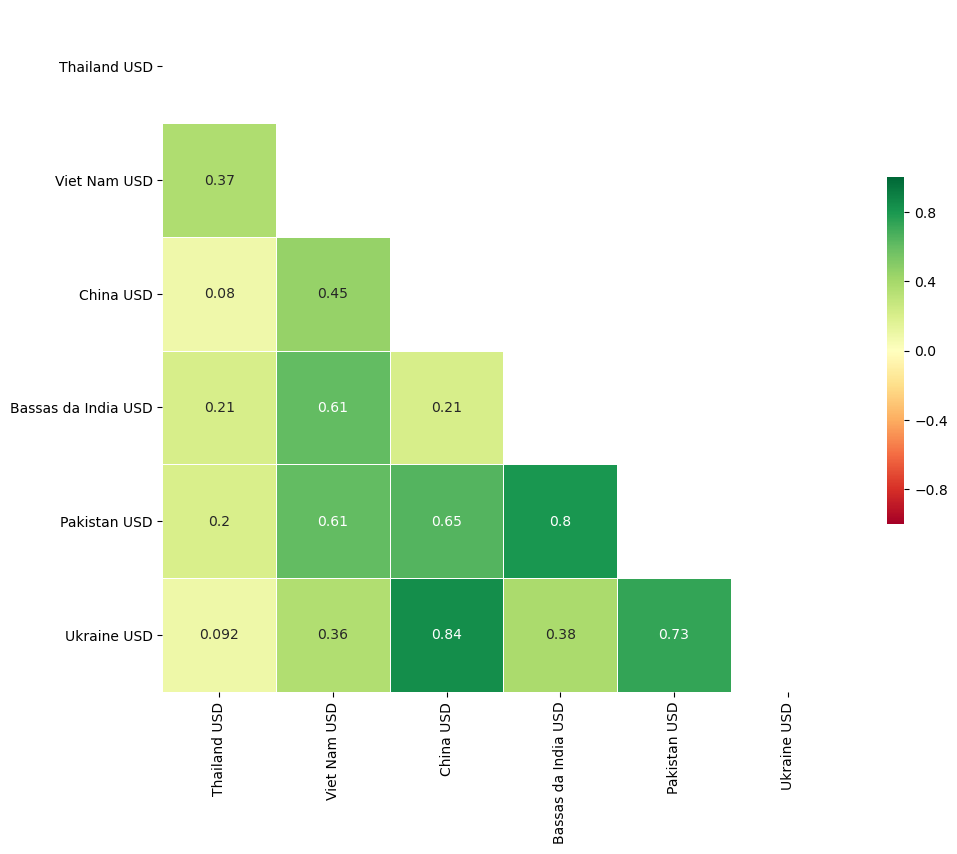

In [49]:
##YOUR CODE GOES HERE##

my_headmap(df_exp.corr())

As you can see, the highest correlations for Ukraine are with China and Pakistan.


#### Forecasting by a machine learning model


Let's build a Linear model in the same way:


- split into Test and Training DataSets:


In [50]:
##YOUR CODE GOES HERE##

train = df_exp[df_exp.index.get_level_values(0) != 2017]
test = df_exp[df_exp.index.get_level_values(0) == 2017]

- create a list of input and output fields:


In [51]:
##YOUR CODE GOES HERE##

x_col = df_exp.columns[:-1]
y_col = df_exp.columns[-1:]

- create Test and Train DataSets:


In [52]:
##YOUR CODE GOES HERE##

x_train = train[x_col]
y_train = train[y_col]
x_test = test[x_col]
y_test = test[y_col]
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (34, 5)
y_train: (34, 1)
x_test: (11, 5)
y_test: (11, 1)


- create and fit a Linear model


In [53]:
##YOUR CODE GOES HERE##

regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

- calculate accuracy:


In [ ]:
##YOUR CODE GOES HERE##

<details><summary>Click <b>here</b> for the solution</summary> 
<code>    
print("Correlation train", regressor.score(x_train, y_train))
print("Correlation test", regressor.score(x_test, y_test))
print("Coefficients:", regressor.coef_)
# pair the feature names with the coefficients
print('Pair the feature names with the coefficients:')
for s in zip(col[1:], regressor.coef_):
    print(s[0], ":", s[1])
print("Intercept", regressor.intercept_)
print('Mean Absolute Error (train):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Absolute Error (test):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error (train):', metrics.mean_squared_error(y_train, y_pred_train))
print('Mean Squared Error (test):', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error (test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    </code>
</details>


- create a resulting DataFrame


In [ ]:
##YOUR CODE GOES HERE##

<details><summary>Click <b>here</b> for the solution</summary> 
<code>    
for_test = pd.DataFrame({'Actual_test': y_test.values.flatten(), 
                         'Predicted_test': y_pred_test.flatten()})
for_test.index = y_test.index
for_train = pd.DataFrame({'Actual_train': y_train.values.flatten(), 
                         'Predicted_train': y_pred_train.flatten()})
for_train.index = y_train.index
res = for_train.join(for_test, how='outer')
res
    </code>
</details>


- plot the results:


In [ ]:
##YOUR CODE GOES HERE##

<details><summary>Click <b>here</b> for the solution</summary> 
<code>    
res.plot(xlabel='Years', ylabel='Rice price', title=y_col[0], rot=90)
plt.show()
    </code>
</details>


#### Sensitivity analysis


Let's calculate how price fluctuation on the markets of exporting countries impact upon Ukrainian rice market.


In [ ]:
for c in df_exp.columns[:-1]:
    print("Sensitivity of Ukraine Rice price on %s Rice price: %5.2f%%" % (c, my_sens(df_exp[[c]], df_exp['Ukraine USD'], 0.1) * 100))

As you can see, Ukrainian rice market depends heavily on Chinese market prices. Thus, a 10% price increase on Chinese markets leads to a more than 38% price increase in Ukraine. For Pakistan, this dependence is almost twice as weak. Thus, a 10% price increase will lead to a 15% price increase in Ukraine.


## Conclusions


In this lab, we learned how to use Pandas tools and the Scikit-learn machine learning framework to analyse price dynamics for major purchase groups based on other products prices or other markets prices. A currency converter was also built and used to forecast rice prices in Ukraine depending on prices on the markets of major exporting countries. It was shown how to analyse the sensitivity and accuracy of the obtained models.


## Authors


Developer: [Yaroslav Vyklyuk, prof., PhD., DrSc](https://author.skills.network/instructors/yaroslav_vyklyuk_2)


Retail Consultant: [Olha Vdovichena, ass. prof, PhD](https://author.skills.network/instructors/olha_vdovichena)


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).
